## Ariane particels on long MITgcm run (CNT03)

372 particles initialized at dufferent upstream positions and depths in CNT run03.

In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys
#####
from matplotlib import pylab

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm

from matplotlib import animation


In [2]:

import canyon_tools.readout_tools as rout
import canyon_tools.metrics_tools as mpt

In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
CGrid ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob_cropped.nc' 

CGridOut=Dataset(CGrid)
CState ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob_cropped.nc' 

#for dimobj in CGridOut.variables.values():
#    print dimobj



In [11]:

# General input
npart = 203
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 


rc = CGridOut.variables['RC']
zl = CGridOut.variables['Zl']


dxf = CGridOut.variables['dxF']
xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

rA = rout.getField(CGrid, 'rA') 

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
mask_NoC = rout.getMask(CGrid, 'HFacC')

bathy = rout.getField(CGrid,'Depth')
times = np.arange(0,nt,1)


In [6]:
f = Dataset('/ocean/kramosmu/Ariane/TracerExperiments/CNTDIFF/run03_372part/ariane_trajectories_qualitative.nc','r');


In [7]:
f_lont = f.variables['traj_lon']
f_latt = f.variables['traj_lat']
f_dept = f.variables['traj_depth']
f_timet = f.variables['traj_time']

f_zs = f.variables['init_z']
f_xs = f.variables['init_x']
f_ys = f.variables['init_y']
f_lont.shape

(19, 203)

Particles started at day 8.5


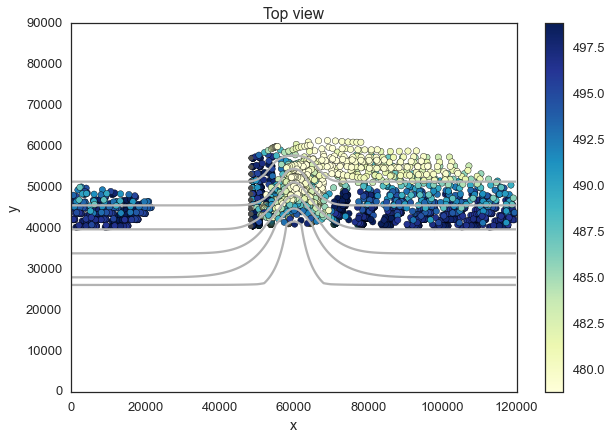

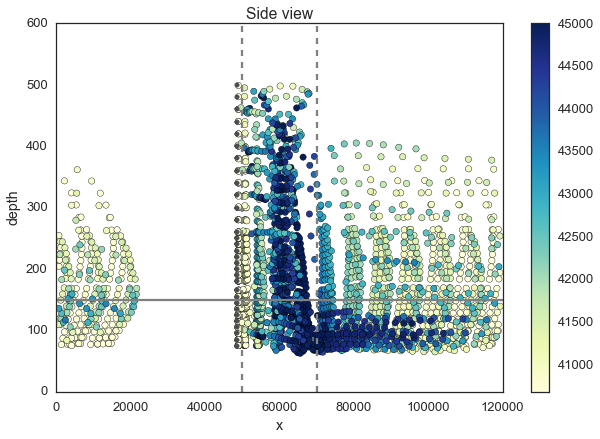

In [17]:
n = np.arange(npart)
colors = cm.rainbow(np.linspace(0, 1, len(n)))
mkr = ['o']
# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
ax.contour(xc,yc,bathy,[150,350,550,750,950,1150],colors = '0.70')
for N in n:
    sca = ax.scatter(f_lont[1:15,N],f_latt[1:15,N],c=f_dept[1:15,N],marker = mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_latt[0,N],color='0.30',marker=mm)


plt.colorbar(sca)

ax.set_xlim([0,120000])
ax.set_ylim([0,90000])
ax.set_title('Top view')
ax.set_xlabel('x')
ax.set_ylabel('y')


# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
for N in n:
    sca=ax.scatter(f_lont[1:15,N],f_dept[1:15,N],c=f_latt[1:15,N],marker=mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_dept[0,N],color='0.30',marker=mm)
plt.colorbar(sca)
ax.axhline(y=150.0,color = '0.5')
ax.axvline(x=70000.0,color = '0.5', linestyle = '--')
ax.axvline(x=50000.0,color = '0.5', linestyle = '--')

ax.set_xlim([0,120000])

ax.set_title('Side view')
ax.set_xlabel('x')
ax.set_ylabel('depth')

print('Particles started at day 8.5')

In [18]:
print(f_lont[:,:])

[[48512.11157288999 48512.11157288999 48512.11157288999 ...,
  48512.11157288999 -- 48512.11157288999]
 [48918.11299906788 48932.25860481257 48945.1771853004 ...,
  48964.7118420848 -- 48964.7118420848]
 [50546.416638998 50616.33565052118 50680.23762908016 ...,
  50613.61140513519 -- 50613.61140513519]
 ..., 
 [25607.648182015197 27772.36496961088 29472.883810929903 ...,
  61148.470510106876 -- 66407.64993028044]
 [34087.46985324186 36431.828947458984 38240.36560509103 ...,
  59592.459267449056 -- 65278.97365005185]
 [42783.2589141386 45310.81529450742 47226.72145575841 ...,
  58443.60708593908 -- 64044.350636236544]]
